In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AFD514B70>]],
      dtype=object)

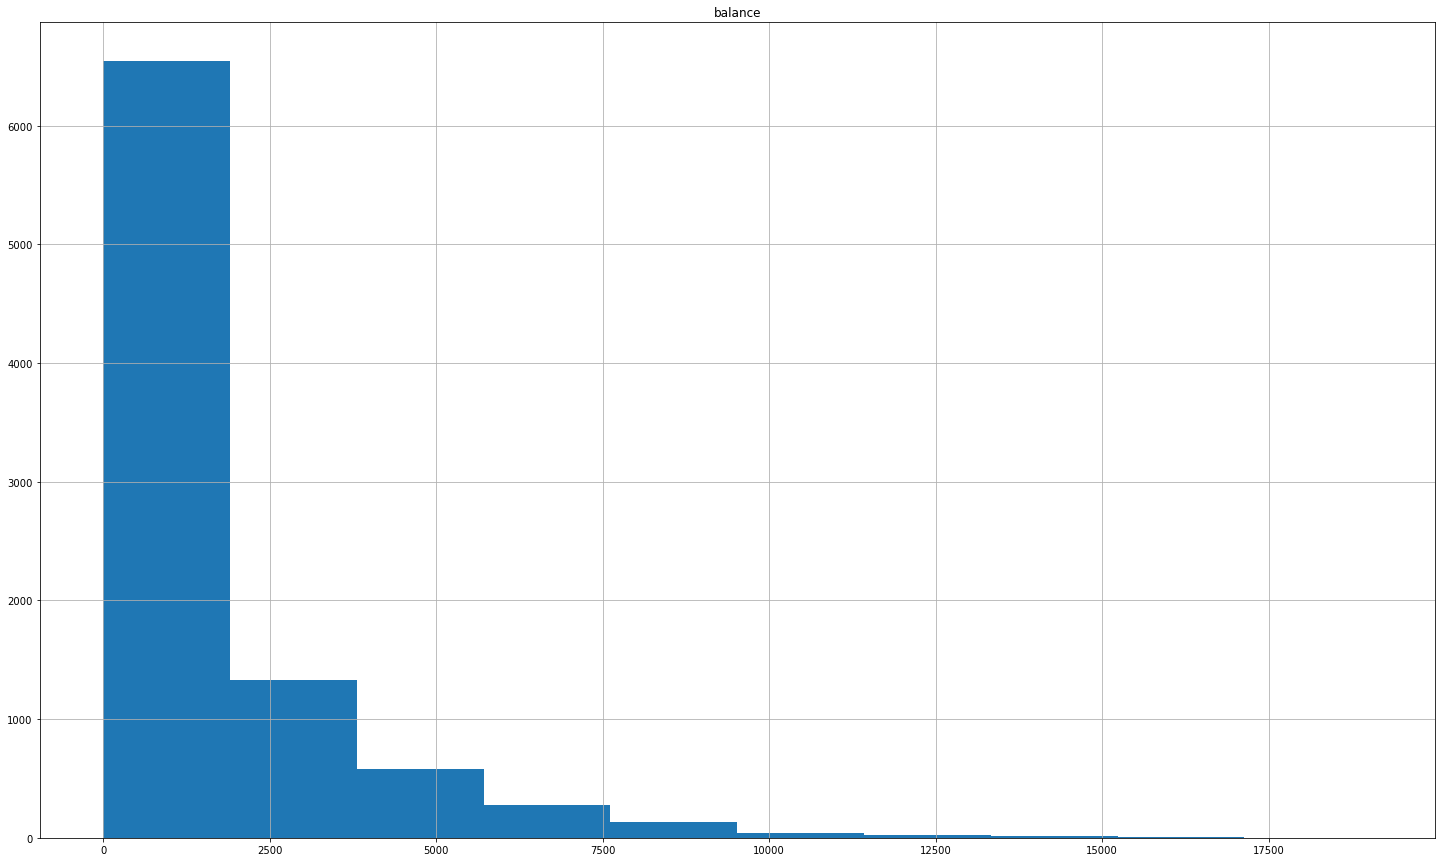

In [2]:
imported_data=pd.read_csv("Stori_Data_Challenge_2021._(1).csv")
imported_data.activated_date=pd.to_datetime(imported_data.activated_date, format='%Y-%m-%d')
imported_data["activated_date_YM"]=imported_data["activated_date"].dt.to_period('M')
imported_data.last_payment_date=pd.to_datetime(imported_data.last_payment_date, format='%Y-%m-%d')
imported_data["last_payment_date_YM"]=imported_data["last_payment_date"].dt.to_period('M')
imported_data.hist(column="balance",bins=10,figsize=(25,15))

In [3]:
data_summary=imported_data[["activated_date_YM","balance"]]
data_summary=data_summary.set_index("activated_date_YM")
median=data_summary.groupby("activated_date_YM").median()["balance"]
result_table=data_summary.groupby("activated_date_YM").mean()
result_table=result_table.rename(columns={"balance":"mean"})
result_table["median"]=median
result_table

,mean,median
activated_date_YM,,
2019-10,2482.234166,1524.409377
2019-11,1848.704323,1082.071173
2019-12,2018.788906,1162.588384
2020-01,1854.535889,1175.749847
2020-02,1747.350977,994.841733
2020-03,1554.973023,828.954823
2020-04,1483.183191,910.141912
2020-05,1214.333732,734.557681
2020-06,939.997996,472.791862


In [4]:
mindate=pd.to_datetime({"year":[2020],"month":[1],"day":[1]})
summary_2020=imported_data.loc[imported_data["activated_date"]>=mindate[0]]
summary_2020=summary_2020.loc[summary_2020["last_payment_date"]>=mindate[0]]

In [5]:
summary_2020=summary_2020[["cust_id","activated_date_YM","last_payment_date","cash_advance","credit_limit"]]
summary_2020["credit_limit_pct"]=summary_2020.cash_advance/summary_2020.credit_limit*100
summary_2020

,cust_id,activated_date_YM,last_payment_date,cash_advance,credit_limit,credit_limit_pct
2633,C12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,C12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,C12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,C12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,C12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
8945,C19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,C19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,C19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,C19189,2020-07,2020-07-19,36.558778,500.0,7.311756


In [6]:
summary_2020["cust_id"]=summary_2020["cust_id"].str.slice_replace(start=None, stop=1, repl='')

In [7]:
summary_2020

,cust_id,activated_date_YM,last_payment_date,cash_advance,credit_limit,credit_limit_pct
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,7.311756


In [8]:
imported_data=imported_data.drop("Unnamed: 0",axis=1)
imported_data=imported_data.dropna()

In [9]:
#import libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

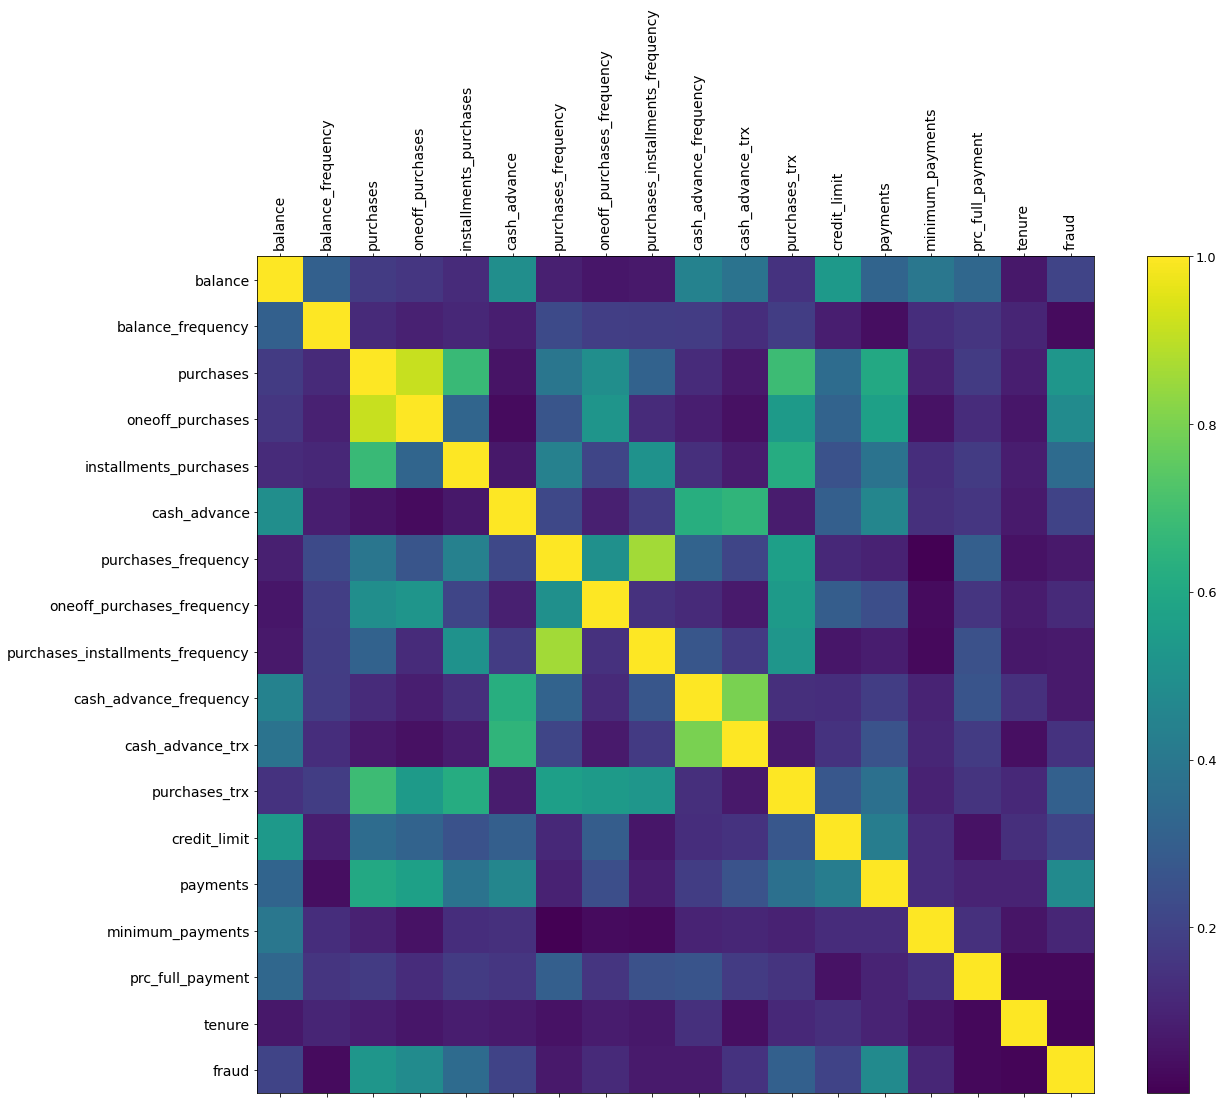

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(imported_data.corr().abs(), fignum=f.number)
plt.xticks(range(imported_data.select_dtypes(['number']).shape[1]), imported_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(imported_data.select_dtypes(['number']).shape[1]), imported_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13)


In [25]:

#select features from dataset, chosen from 'important' variables that are not linearly related with each other.
features=[ "oneoff_purchases_frequency", "purchases_installments_frequency",  "cash_advance"]
data=imported_data[features]
data_binary_encoded = pd.get_dummies(data)
X=data_binary_encoded
y=imported_data['fraud']
#"purchases",

In [26]:
#scaling the data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
#importing model libraries
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier()
model = model.fit(X_train_scaled, y_train)
print(f"Training score: {model.score(X_train_scaled,y_train)}")
print(f"Test score: {model.score(X_test_scaled,y_test)}")

Training score: 0.9921531701192718
Test score: 0.9943529411764706


In [29]:
#model.accuracy(model.score(X_test_scaled,y_test))
model.score(X_test_scaled,y_test)

0.9943529411764706

In [30]:
#testing an individual value for the model of a known confirmed fraud, C10074
print(model.predict([[ 0.5, 0.583333,  27296.48576]]))
#gets a 1 on a fraudulent individual test, it works.419.1,

[1]
